<a href="https://colab.research.google.com/github/vvadimmm/Quant/blob/main/Modele_Heston_vol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


\begin{cases}
\Large
dS_t = S_t (r - q)\,dt + S_t \sqrt{v_t}\, dW_t^{(1)} \\
\Large
dv_t = \kappa(\theta - v_t)\,dt + \sigma_v \sqrt{v_t}\, dW_t^{(2)}
\end{cases}

$$
\mathbb{E}\left[dW_t^{(1)} dW_t^{(2)}\right] = \rho\, dt
$$


\begin{aligned}
r & : \text{taux sans risque} \\
q & : \text{taux de dividende} \\
\kappa & : \text{vitesse de retour à la moyenne de la variance} \\
\theta & : \text{variance de long terme} \\
\sigma_v & : \text{volatilité de la volatilité} \\
\rho & : \text{corrélation spot–volatilité}
\end{aligned}



\
\begin{aligned}
\Delta W_t^{(1)} &= \sqrt{\Delta t}\, Z_1 \\
\Delta W_t^{(2)} &= \sqrt{\Delta t}\, (\rho Z_1 + \sqrt{1-\rho^2} Z_2)
\end{aligned}



In [ ]:
def W1(n,dt):
  L=[0]
  for i in range(n-1):
    L.append(L[i]+np.random.normal(0,dt))
  return(L)

In [ ]:
def W2(W1,rho,dt):
  L=[0]
  for i in range(len(W1)-1):
    dW1=W1[i+1]-W1[i]
    L.append(L[i]+rho*dW1+np.sqrt(1-rho**2)*np.random.normal(0,dt))
  return(L)


Visualisation des deux mouvements browniens corrélés

[[ 1.         -0.05970337]
 [-0.05970337  1.        ]]


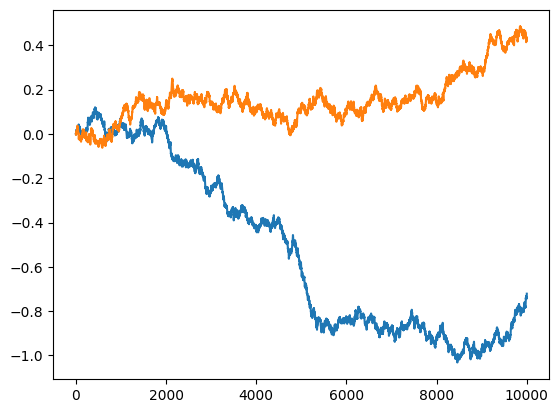

In [ ]:
a=W1(10000,1/252)
b=W2(a,-0.05,1/252)
corr_empirique = np.corrcoef(np.diff(a), np.diff(b))

plt.plot(range(10000),a)
plt.plot(range(10000),b)
print(corr_empirique)


Discrétisation de la variance:
$$
\
v_{t+\Delta t}
=
v_t
+
\kappa\left(\theta - \max(v_t,0)\right)\Delta t
+
\sigma_v \sqrt{\max(v_t,0)} \, \Delta W_t^{(2)}
\\
v_{t+\Delta t} = \max(v_{t+\Delta t},0)
$$


In [ ]:
def variance(n,v0,dt,k,teta,sigmav,W2):
  L=[v0]
  for i in range(n-1):
    dW2=W2[i+1]-W2[i]
    dv=k*(teta-max(L[i],0))*dt+sigmav*np.sqrt(max(L[i],0))*dW2
    L.append(max(0,L[i]+dv))
  return(L)

Visualisation de la variance

0.04054350185846338
0.002147713881164241


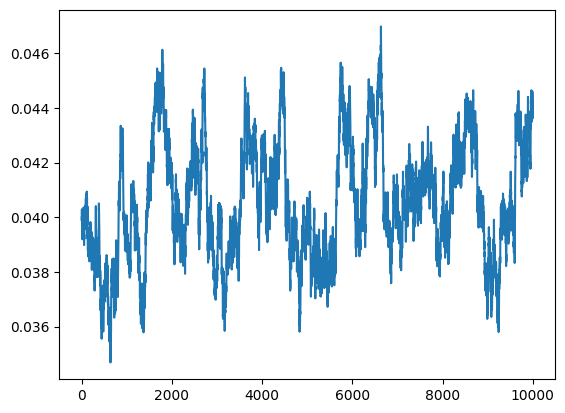

In [ ]:
a=W1(10000,1/252)
b=W2(a,-0.6,1/252)
n=10000
v0=0.04
dt=1/252
k=1.5
teta=0.04
sigmav=0.3
W=b
v=variance(n,v0,dt,k,teta,sigmav,W)
plt.plot(range(len(v)),v)

print(np.mean(v))
print(np.std(v))

Discrétisation du sous-jacent:
$$
S_{t+\Delta t}
=
S_t
\exp\left(
\left(r - q - \frac12 v_t\right)\Delta t
+
\sqrt{v_t}\, \Delta W_t^{(1)}
\right)
$$


In [ ]:
def S_path(n,S0,dt,r,v,W1):
  L=[S0]
  for i in range(n-1):
    dW1=W1[i+1]-W1[i]
    L.append(L[i]*np.exp((r-0.5*v[i]**2)*dt+np.sqrt(v[i])*dW1))
  return(L)

Visualisation du sous-jacent (bleu) et variance (orange)

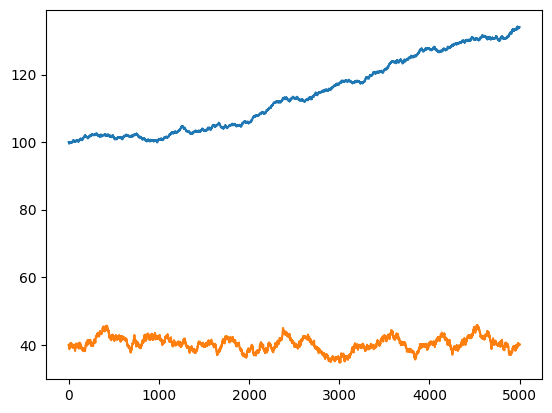

In [ ]:
dt=1/252
n=5000
rho=-0.05
r=0.02
S0=100
v0=0.04
teta=0.04
k=1.5
sigmav=0.3

a=W1(n,dt)
b=W2(a,rho,dt)
v=variance(n,v0,dt,k,teta,sigmav,b)
S=S_path(n,S0,dt,r,v,a)
v=np.array(v)*1000
plt.plot(range(len(S)),S)
plt.plot(range(len(v)),v)


In [ ]:
corr = np.corrcoef(np.diff(S),
                   np.diff(v))[0,1]
print(corr)

-0.026945447120669052
